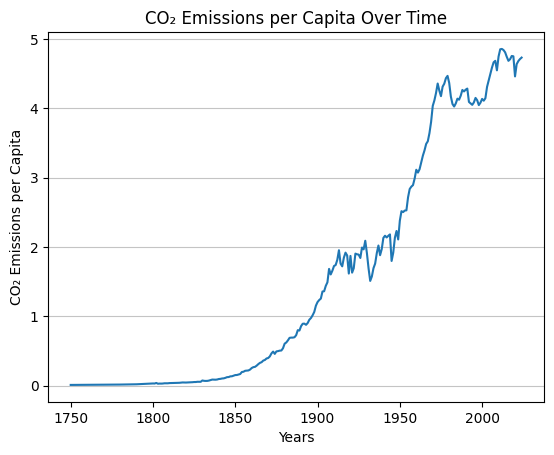

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("default")   # turn off matplotlib dark style
plt.rcdefaults()

dfco2 = pd.read_csv("./co2-emissions-per-capita.csv")
pd.set_option('display.max_columns', None)

dfco2.head()
dfco2["CO₂ emissions per capita"].isnull().sum()

plt.plot(dfco2["Year"],dfco2["CO₂ emissions per capita"])
plt.xlabel("Years")
plt.ylabel("CO₂ Emissions per Capita")
plt.title("CO₂ Emissions Over Years")
plt.grid(axis='y', alpha=0.75)
plt.show()